In [1]:
%%capture
#In Azure notebooks, on first run per session, this package installation cell could take a considerable time to run
try:
    import music21
except:
    ! wget http://lilypond.org/download/binaries/linux-64/lilypond-2.18.2-1.linux-64.sh
    #then for forced (no prompts) install:
    !sh lilypond-2.18.2-1.linux-64.sh --batch
    !pip install music21

LILYPOND_PATH = '/home/nbuser/bin/lilypond'

%matplotlib inline
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

%load_ext music21.ipython21

from IPython.display import Image

from music21 import *
environment.UserSettings()['lilypondPath']= LILYPOND_PATH

def render(s):
    return Image(filename=str(s.write(fmt='lily.png')))

def showlily(s):
    print(lily.translate.LilypondConverter().textFromMusic21Object(s))

# OpenLearn - An introduction to music theory

This notebook demonstrates a partial reworking of the OpenLearn course [An introduction to music theory](http://www.open.edu/openlearn/history-the-arts/culture/music/introduction-music-theory/content-section-0?active-tab=content-tab).


----

## 2 The basics
### 2.1 The staff

The idea of placing notes on a set of horizontal lines – the staff –to show the relationship of various pitches with each other – staff notation – emerged in western music towards the end of the ninth century. Originally, each pitch was allocated its own line, but the Italian music theorist, Guido of Arezzo, who lived during the early eleventh century, suggested that lines should be drawn for every other pitch, so that alternate pitches sat on the lines and the remaining pitches were placed in the intervening spaces between the lines.

This principle was soon adopted and has remained in force in traditional western music notation to the present day. The number of lines included in the staff has varied depending on the range of the music being notated. However, the norm has evolved as the five-line staff, shown in Example 1.

#### Example 1

*I'm not sure how to do empty staves in `music21`...*

In [2]:
import os
from IPython.display import Image

def lp(score):
    score='''\version "2.18.2"
    \header {{ 
    tagline = ""  % removed 
    }} {}'''.format(score)
    with open("test.ly", "w") as out_file:
        out_file.write(score)
    os.system( "{} -dbackend=eps -dno-gs-load-fonts -dinclude-eps-fonts --png test.ly".format(LILYPOND_PATH) )
    return Image(filename='test.png')
#Handy lilypond editor - http://lilybin.com/#

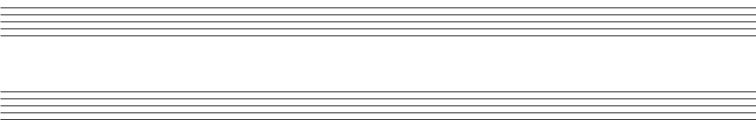

In [3]:
#Should make some block magic for entering lilypond script?
empty=r"""
#(set-global-staff-size 20)

\score {
  {
    \repeat unfold 2 { s1 \break }
  }
  \layout {
    indent = 0\in
    \context {
      \Staff
      \remove "Time_signature_engraver"
      \remove "Clef_engraver"
      \remove "Bar_engraver"
    }
    \context {
      \Score
      \remove "Bar_number_engraver"
    }
  }
  }
"""
lp(empty)

As shown in Example 2, if we place pitches in the form of note heads on the staff, information about the relationship of the pitches with each other is produced.

#### Example 2

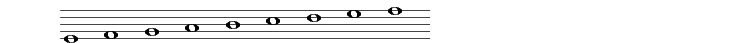

In [99]:
lp(r'''
#(set-global-staff-size 20)
\score{
    {
        e'1 f' g' a' b' c'' d'' e'' f''
    }

    \layout{\context {
      \Staff
        \remove "Time_signature_engraver"
        \remove "Clef_engraver"
        \remove "Bar_engraver"
      }
  }
}
''')

### 2.2 Clefs
As it stands, the first note in Example 2 could be any pitch we care to choose.

So if we wish to specify a particular pitch or series of pitches we need some sort of guide – a sign that will enable us to indicate the specific pitch. That sign is supplied by a clef (from the Latin, clavis, meaning ‘key’). From the eleventh century onwards, several Roman letters, including c and f, were used systematically for clefs, with g subsequently becoming increasingly common. In a stylised form, g, with flamboyant curls and flourishes, is still used as the treble or G clef, and signifies that a note placed on the second line from the bottom is G (see Example 3).

#### Example 3

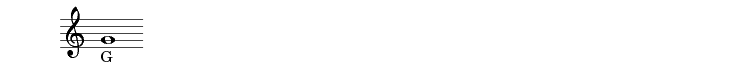

In [114]:
lp(r'''
#(set-global-staff-size 20)
\score{
    {
     g'1-"G"
    }

    \layout{\context {
      \Staff
        \remove "Time_signature_engraver"
        \remove "Bar_engraver"
      }
  }
  
}
''')

In [ ]:
#I think we can export midi from lilypond? Just add \midi{} to the score?

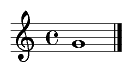

In [20]:
#If we generate midi from music21, it automatically adds time measure and clef
s = stream.Stream()

m = "tinyNotation: g1"

#s.append(note.Note('G', type='whole'))
s = converter.parse(m)

display(render(s))

#To get the midi file to play properly, it seems as if we need to add a rest at the start
_m = m.split(':')
if len(_m)==2 and _m[0]=='tinyNotation':
    sm = converter.parse(''.join(['tinyNotation: ','r', m.split(':')[1]]))
    sm.show('midi')
else:
    s.show('midi')

And this is not any G, but specifically the one above middle C. (We’ll come to an explanation of middle C in a moment.)

As Example 4 shows, the other notes are named with letters from the alphabet, A–G, with A returning after G has been reached.

#### Example 4

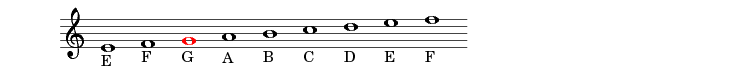

In [133]:
lp(r'''
#(set-global-staff-size 20)
\score{
    {
     e'1-"E" f'-"F" 
     		 \override NoteHead.color = #red
		 g'-"G"
		 \override NoteHead.color = #black
		 \override Stem.color = #black
          a'-"A" b'-"B" c''-"C" d''-"D" e''-"E" f''-"F"
    }

    \layout{\context {
      \Staff
        \remove "Time_signature_engraver"
        \remove "Bar_engraver"
      }
  }
  
}
''')

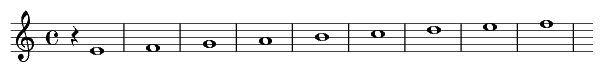

In [128]:
s = stream.Stream()
#For the midi to play correctly, it seems we need to insert a rest at the beginning?
s.append(note.Rest())
s.append(note.Note('E4', type='whole'))
s.append(note.Note('F4', type='whole'))
s.append(note.Note('G4', type='whole'))
s.append(note.Note('A4', type='whole'))
s.append(note.Note('B4', type='whole'))
s.append(note.Note('C5', type='whole'))
s.append(note.Note('D5', type='whole'))
s.append(note.Note('E5', type='whole'))
s.append(note.Note('F5', type='whole'))
display((render(s)))
s.show('midi')

Notice that as the notes are placed higher and higher up the staff, the pitch becomes higher and higher as well. Notice too that we read music from left to right, and with a whole page of music, from top to bottom. This reflects the way we read words in western culture.

The letter, f, in a stylised form and in a mirror image, is now used as the bass or F clef. It signifies that a note placed on the second line from the top is F, and specifically the F below middle C (see Example 5).

#### Example 5

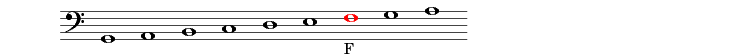

In [135]:
#Not sure how to colour additional text
lp(r'''\score{

	{ \clef F
		 g,1 a, b, c d e
		 \override NoteHead.color = #red
		 f-"F"
		 \override NoteHead.color = #black
		 \override Stem.color = #black
		 g a
	}

	\layout{\context {
      \Staff
	  \remove "Time_signature_engraver"

      \remove "Bar_engraver"}
}
}
''')

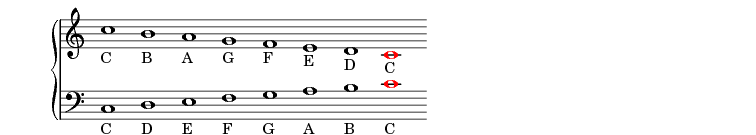

In [162]:
#Not sure how to add the whitespace in upper stave?
lp(r'''\score{

	\new GrandStaff <<
  \new Staff \relative { c''1-"C" b-"B" a-"A" g-"G" f-"F" e-"E" d-"D"  \override NoteHead.color = #red c-"C"  }
  \new Staff \relative { \clef "bass" c1-"C" d-"D" e-"E" f-"F" g-"G" a-"A" b-"B" \override NoteHead.color = #red c-"C" | }
>>

	\layout{\context {
      \Staff
	  \remove "Time_signature_engraver"

      \remove "Bar_engraver"}
}
}
    	\layout{\context {
      \Staff
	  \remove "Time_signature_engraver"

      \remove "Bar_engraver"}
}
}
''')

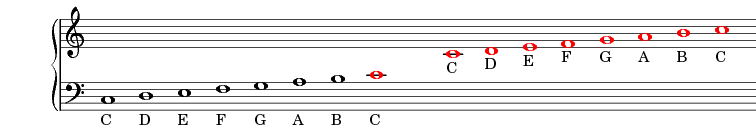

In [69]:
#How can we force the autochanger to use a middle C on the upper staff after the switch?
lp(r'''\score{

\new GrandStaff {
 \autochange {
c1-"C" d-"D" e-"E" f-"F" g-"G" a-"A" b-"B" \override NoteHead.color = #red c'-"C" 
     \hideNotes g' \unHideNotes
     c'-"C"
     \override NoteHead.color = #red d'-"D" e'-"E" f'-"F"  g'-"G" a'-"A" 
    b'-"B"     c''-"C" 
  }
}


	\layout{\context {
      \Staff
	  \remove "Time_signature_engraver"

      \remove "Bar_engraver"}
}
}

''')

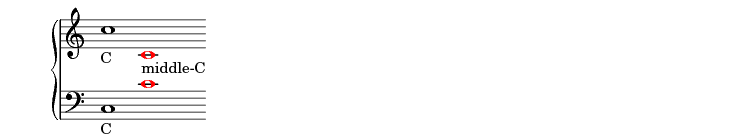

In [158]:
#Red C is the same note - middle C...
lp(r'''\score{

	\new GrandStaff <<
  \new Staff \relative {  c''1-"C" \override NoteHead.color = #red  c,-"middle-C" }
  \new Staff \relative { \clef "bass"  c1-"C" \override NoteHead.color = #red c'}
>>

	\layout{\context {
      \Staff
	  \remove "Time_signature_engraver"

      \remove "Bar_engraver"}
}
}
    	\layout{\context {
      \Staff
	  \remove "Time_signature_engraver"

      \remove "Bar_engraver"}
}
''')

### TH doodlings

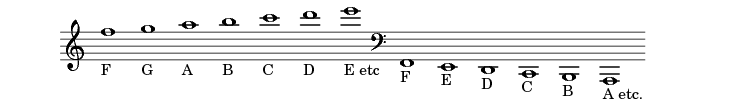

In [51]:
#example 9
lp(r'''\score{
\new Staff { 
             \relative c'' {
  \clef treble
 f1-"F" g-"G" a-"A" b-"B" c-"C" d-"D" e-"E etc"

              }
			  \relative g,
             \clef bass
             f,-"F" e,-"E" d,-"D" c,-"C" b,,-"B" a,,-"A etc."
}

	\layout{\context {
      \Staff
	  \remove "Time_signature_engraver"

      \remove "Bar_engraver"}
}
}

''')

In [21]:
noteC = note.Note("C4", type="half")
noteD = note.Note("D4", type="quarter")
noteE = note.Note("E4", type="half")
noteF = note.Note("F4", type="quarter")

tsThreeFour = meter.TimeSignature('3/4')

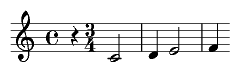

In [24]:
stream1 = stream.Stream()

for thisThing in [note.Rest(), tsThreeFour, noteC, noteD, noteE, noteF]:
    stream1.append(thisThing)
    
display(render(stream1))
stream1.show('midi')

In [28]:
def viewer(s, typ='stream'):
    def _viewer(_s):
        display(render(_s))
        _s.show('midi')

    if typ=='stream':
        _viewer(s)
    elif typ=='tiny':
        _viewer(converter.parse('tinyNotation: {}'.format(s)))

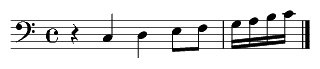

In [32]:
#Capital letters root on C in bass clef
#lower case c is middle C
viewer("4/4 r C4 D E8 F G16 A B c",'tiny')

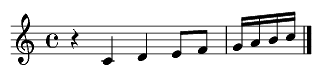

In [43]:
#Apostrophe suffix is C above middle C
viewer("4/4 r c4 d e8 f g16 a b c'",'tiny')

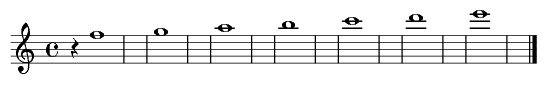

In [80]:
viewer("4/4 r f'1 g' a' b' c'' d'' e''",'tiny')

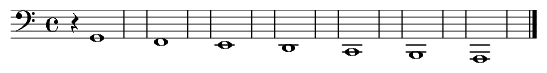

In [78]:
viewer("4/4 r GG1 FF EE DD CC BBB AAA",'tiny')